In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib
import seaborn as sns

In [52]:
ds=pd.read_csv('bikesharingperhour.csv')
ds

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [53]:
ds.keys()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [54]:
ds.shape

(17379, 17)

In [55]:
ds.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [56]:
ds.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [57]:
ds.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

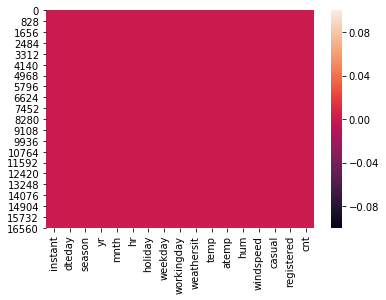

In [58]:
sns.heatmap(ds.isnull())

In [59]:
# Summary Statistics
ds.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


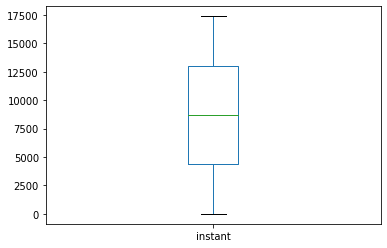

In [60]:
ds['instant'].plot.box()

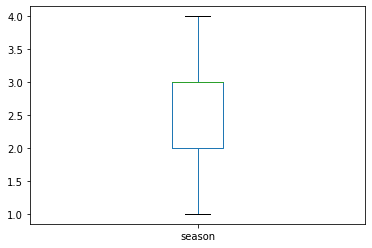

In [61]:
ds['season'].plot.box()

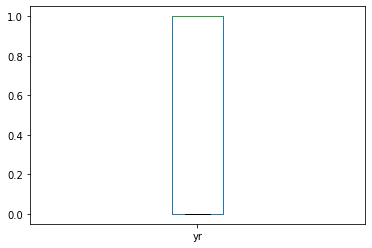

In [62]:
ds['yr'].plot.box()

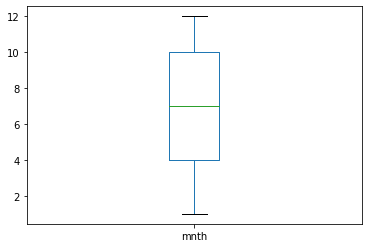

In [63]:
ds['mnth'].plot.box()

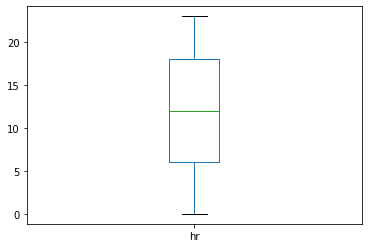

In [64]:
ds['hr'].plot.box()

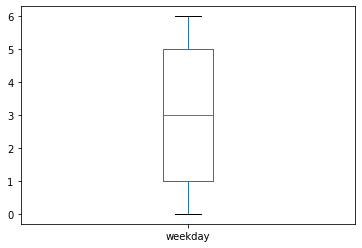

In [65]:
ds['weekday'].plot.box()

instant          AxesSubplot(0.125,0.536818;0.0824468x0.343182)
season        AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
yr            AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
mnth          AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
hr            AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
holiday       AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
weekday       AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
workingday    AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
weathersit          AxesSubplot(0.125,0.125;0.0824468x0.343182)
temp             AxesSubplot(0.223936,0.125;0.0824468x0.343182)
atemp            AxesSubplot(0.322872,0.125;0.0824468x0.343182)
hum              AxesSubplot(0.421809,0.125;0.0824468x0.343182)
windspeed        AxesSubplot(0.520745,0.125;0.0824468x0.343182)
casual           AxesSubplot(0.619681,0.125;0.0824468x0.343182)
registered       AxesSubplot(0.718617,0.125;0.0824468x0.343182)
cnt              AxesSubplot(0.817553,0.

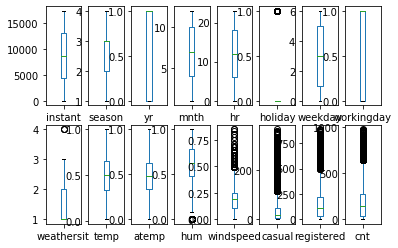

In [66]:
# ds.plot;
ds.plot(kind='box',subplots=True,layout=(2,8))

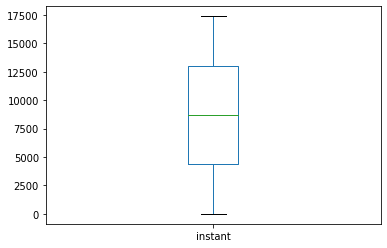

In [67]:
ds['instant'].plot.box()

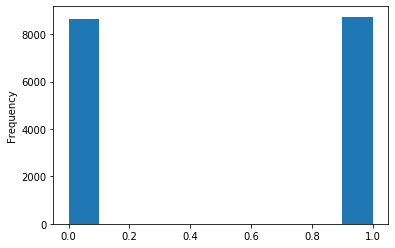

In [68]:
ds['yr'].plot.hist()

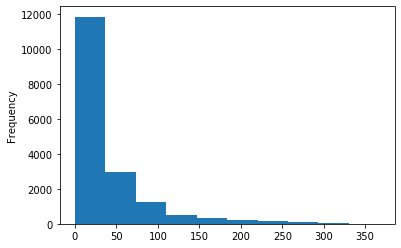

In [69]:
ds['casual'].plot.hist()

In [70]:
from scipy.stats import boxcox
ds['cnt']=boxcox(ds['cnt'],0)

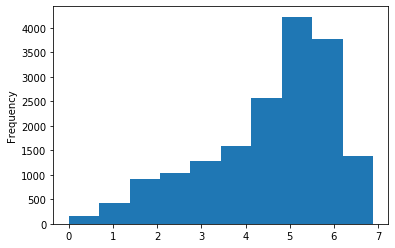

In [71]:
ds['cnt'].plot.hist()

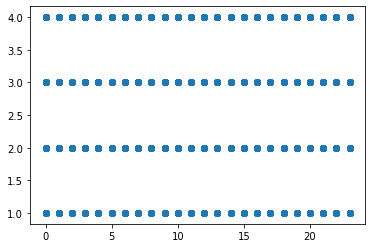

In [72]:
plt.scatter(ds['hr'],ds['season'])

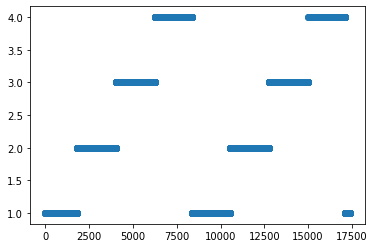

In [73]:
plt.scatter(ds['instant'],ds['season'])

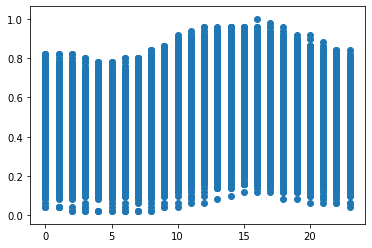

In [74]:
x=ds['hr']
y=ds['temp']
plt.scatter(x,y)
plt.show()

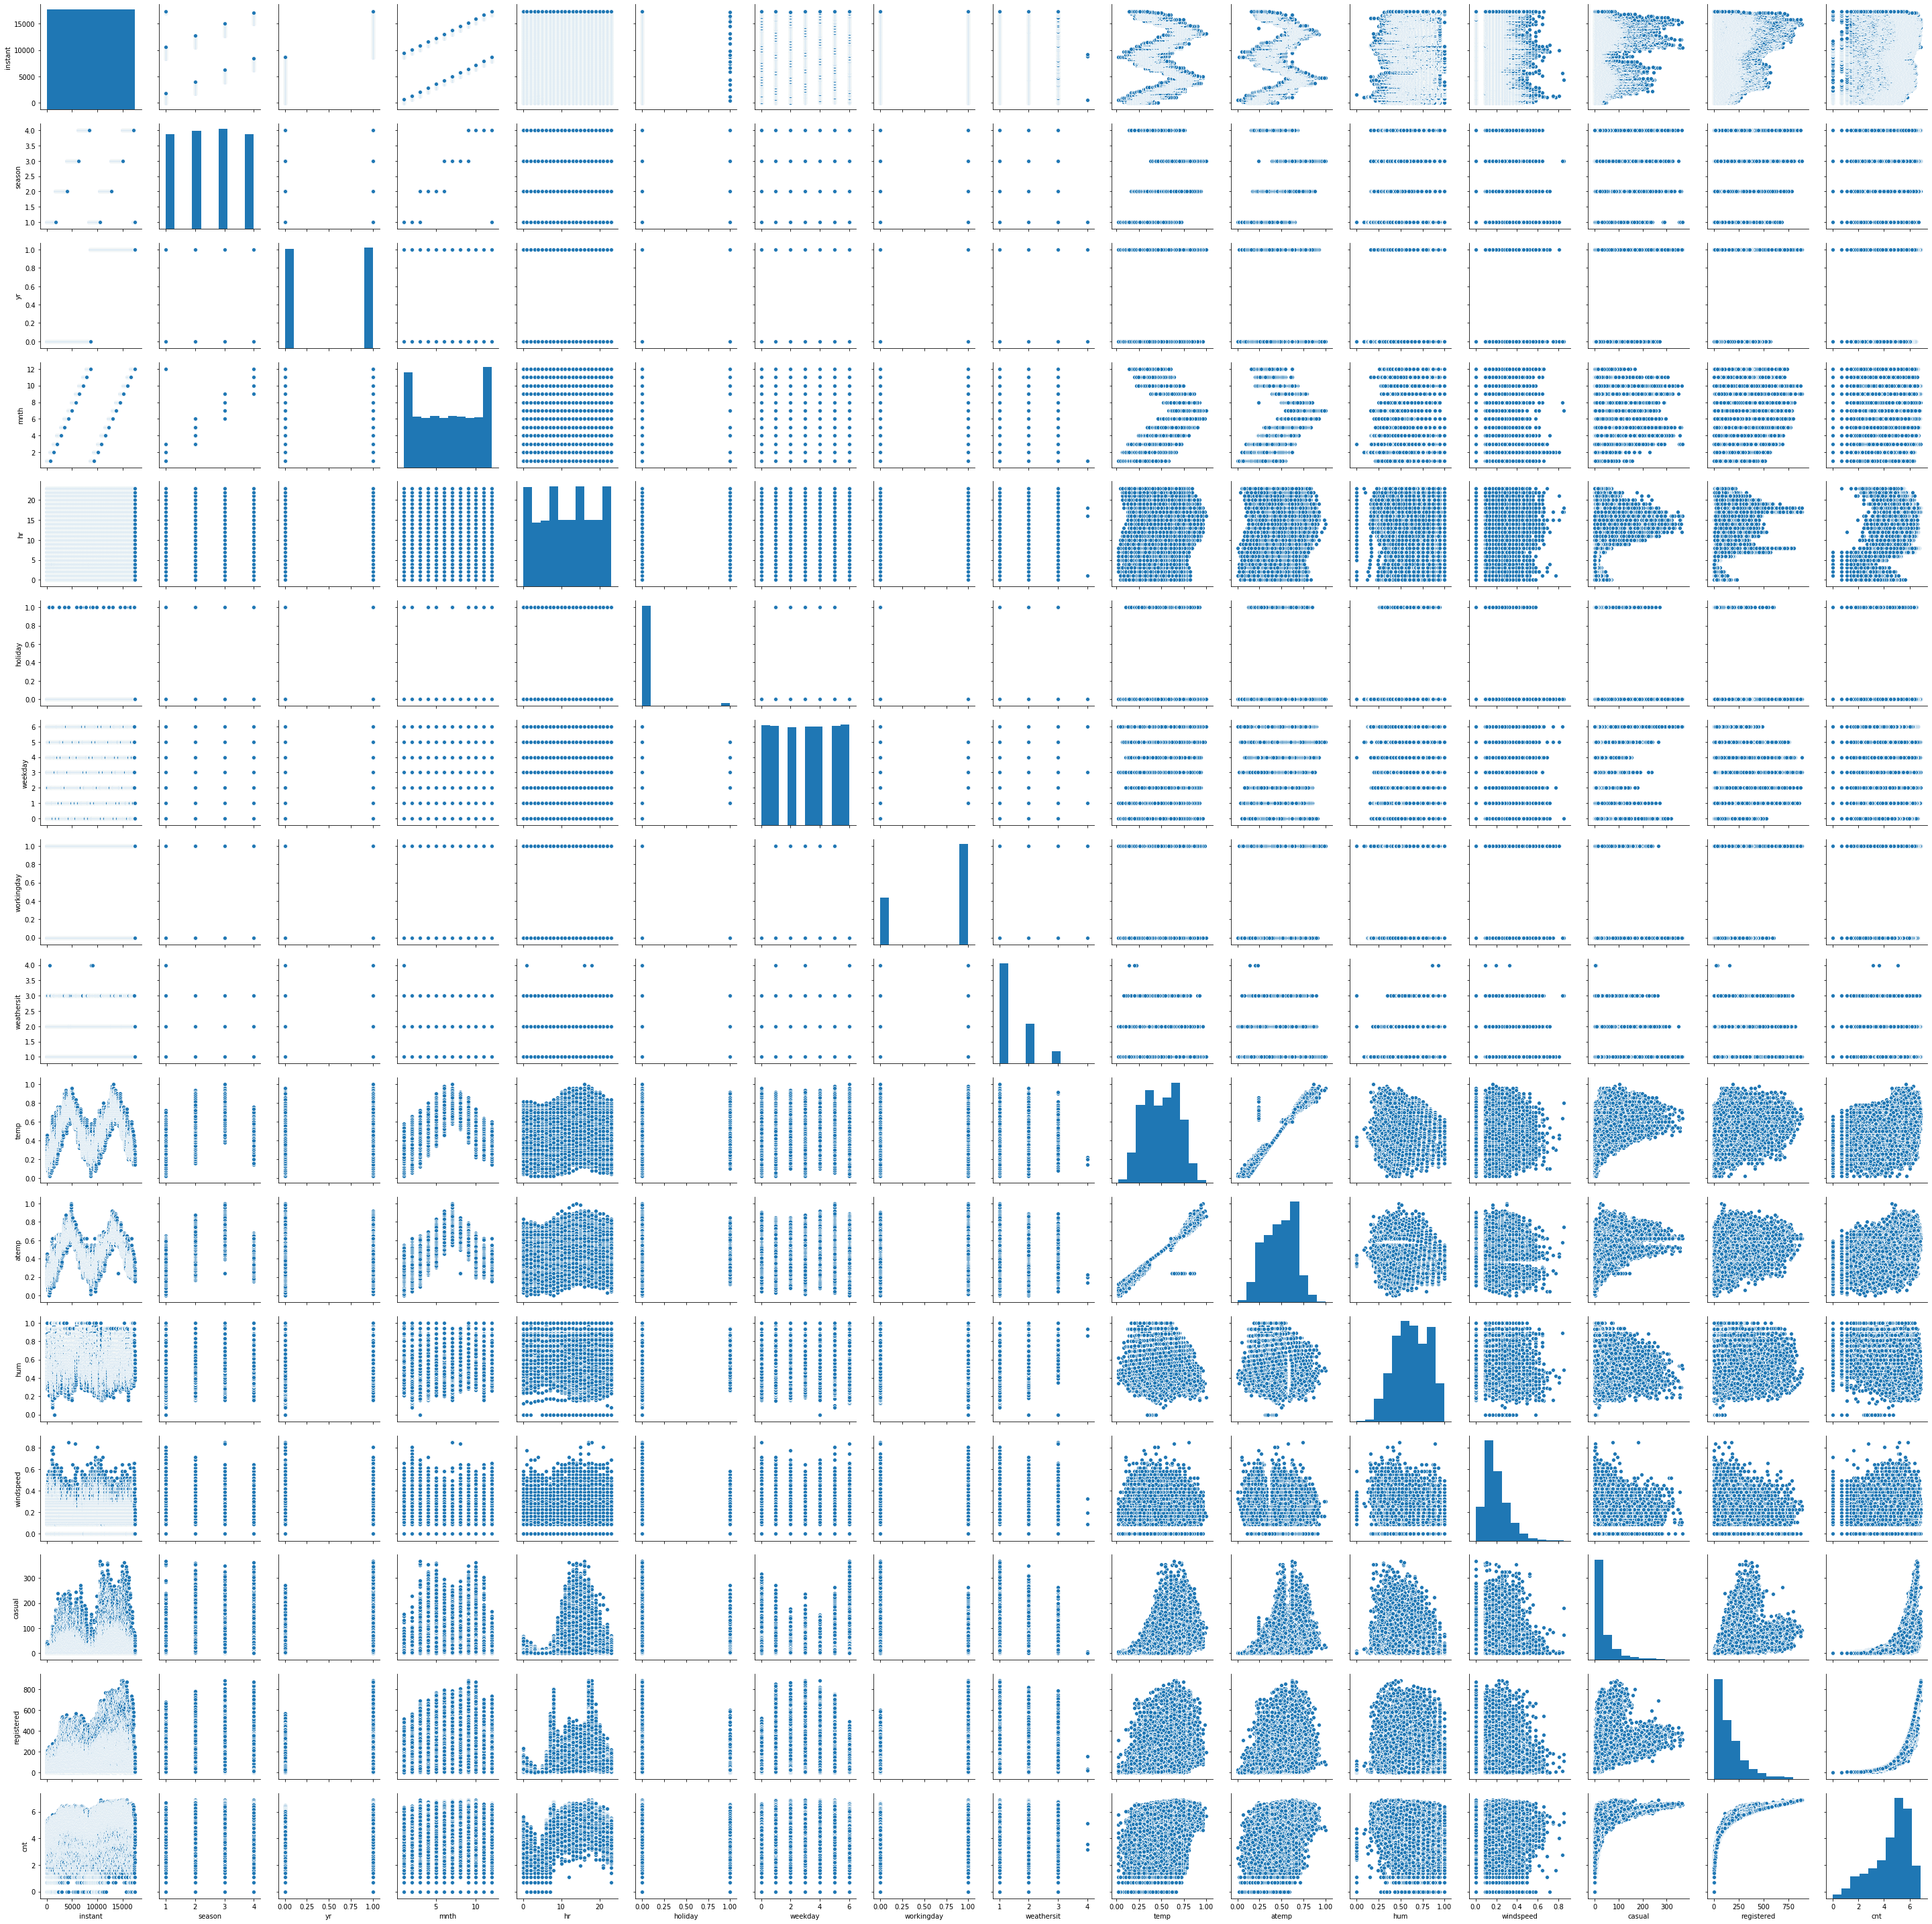

In [75]:
sns.pairplot(ds)

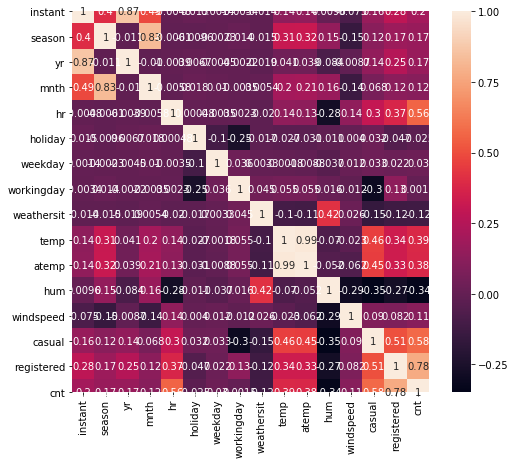

In [76]:
corr_hmap=ds.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

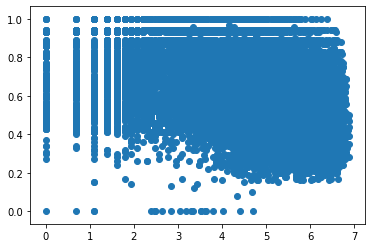

In [77]:
plt.scatter(ds['cnt'],ds['hum'])
plt.show()

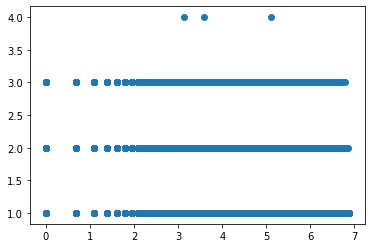

In [78]:
plt.scatter(ds['cnt'],ds['weathersit'])
plt.show()

In [79]:
#drop the weagthersit
ds.drop('weathersit',axis=1,inplace=True)

In [80]:
ds.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,0.24,0.2879,0.81,0.0,3,13,2.772589
1,2,2011-01-01,1,0,1,1,0,6,0,0.22,0.2727,0.80,0.0,8,32,3.688879
2,3,2011-01-01,1,0,1,2,0,6,0,0.22,0.2727,0.80,0.0,5,27,3.465736
3,4,2011-01-01,1,0,1,3,0,6,0,0.24,0.2879,0.75,0.0,3,10,2.564949
4,5,2011-01-01,1,0,1,4,0,6,0,0.24,0.2879,0.75,0.0,0,1,0.000000


In [81]:
ds.shape

(17379, 16)

In [82]:
x=ds.iloc[:,0:-1]
x.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered
0,1,2011-01-01,1,0,1,0,0,6,0,0.24,0.2879,0.81,0.0,3,13
1,2,2011-01-01,1,0,1,1,0,6,0,0.22,0.2727,0.80,0.0,8,32
2,3,2011-01-01,1,0,1,2,0,6,0,0.22,0.2727,0.80,0.0,5,27
3,4,2011-01-01,1,0,1,3,0,6,0,0.24,0.2879,0.75,0.0,3,10
4,5,2011-01-01,1,0,1,4,0,6,0,0.24,0.2879,0.75,0.0,0,1


In [83]:
y=ds.iloc[:,-1]
y.head()

0    2.772589
1    3.688879
2    3.465736
3    2.564949
4    0.000000
Name: cnt, dtype: float64

In [84]:
#Test be 30% of the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [85]:
x_train.shape

(12165, 15)

In [86]:
y_train.shape

(12165,)

In [87]:
x_test.shape

(5214, 15)

In [88]:
y_test.shape

(5214,)

In [89]:
# Breakdown of Distribution of Classes
print('Class value of Count')
print(y_test.value_counts())
print('Class range of proportions')
print(y_test.value_counts()/len(y_test))

Class value of Count
1.609438    76
2.079442    71
1.098612    68
1.791759    68
0.693147    64
            ..
6.535241     1
6.771936     1
6.236370     1
6.045005     1
6.510258     1
Name: cnt, Length: 714, dtype: int64
Class range of proportions
1.609438    0.014576
2.079442    0.013617
1.098612    0.013042
1.791759    0.013042
0.693147    0.012275
              ...   
6.535241    0.000192
6.771936    0.000192
6.236370    0.000192
6.045005    0.000192
6.510258    0.000192
Name: cnt, Length: 714, dtype: float64


In [90]:
lg=LogisticRegression()

In [91]:
lg.fit(x_train,y_train)

ValueError: could not convert string to float: '2012-05-03'

In [92]:
pred=lg.predict(x_test)
print(pred)

NotFittedError: This LogisticRegression instance is not fitted yet

In [93]:
# To save the model
joblib.dump(ds, 'rf_regressor.pkl')

['rf_regressor.pkl']